In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q drive/"MyDrive"/ML_Plant_dataset.zip



In [19]:
import matplotlib.pyplot as plt

IMAGE_SIZE = [224, 224]

train_path = './plantvillage/PlantVillage'
test_path = './PlantVillage'

BUILDING A RESNET MODEL HERE

In [15]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.image as mpimg

In [ ]:
resnet = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
resnet.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [ ]:
resnet.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'post_relu')>

In [ ]:
for layer in resnet.layers:
  layer.trainable = False


x = Flatten()(resnet.output)

In [ ]:
#As 15 classes
prediction = Dense(15, activation='softmax')(x)

In [ ]:
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='Resnet_Weights.hdf5', verbose=1, 
                               save_best_only=True)

Epoch 1/5
645/645 [==============================] - 465s 660ms/step - loss: 5.1591 - accuracy: 0.7048 - val_loss: 2.4108 - val_accuracy: 0.8852

Epoch 00001: val_loss improved from inf to 2.41075, saving model to Resnet_Weights.hdf5
Epoch 2/5
645/645 [==============================] - 417s 647ms/step - loss: 2.5141 - accuracy: 0.8789 - val_loss: 2.1606 - val_accuracy: 0.9065

Epoch 00002: val_loss improved from 2.41075 to 2.16061, saving model to Resnet_Weights.hdf5
Epoch 3/5
645/645 [==============================] - 415s 644ms/step - loss: 2.0737 - accuracy: 0.9104 - val_loss: 1.4231 - val_accuracy: 0.9351

Epoch 00003: val_loss improved from 2.16061 to 1.42313, saving model to Resnet_Weights.hdf5
Epoch 4/5
645/645 [==============================] - 414s 641ms/step - loss: 1.8822 - accuracy: 0.9229 - val_loss: 1.3419 - val_accuracy: 0.9486

Epoch 00004: val_loss improved from 1.42313 to 1.34186, saving model to Resnet_Weights.hdf5
Epoch 5/5
645/645 [==============================] -

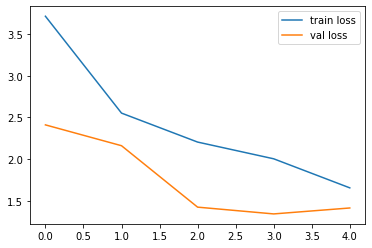

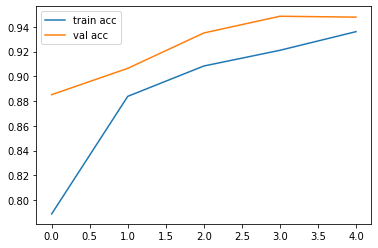

<Figure size 432x288 with 0 Axes>

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  callbacks= [checkpointer],
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
model.load_weights('Resnet_Weights.hdf5')

In [ ]:
score=model.evaluate(test_set)

645/645 [==============================] - 150s 232ms/step - loss: 1.4131 - accuracy: 0.9479


Pepper__bell___healthy


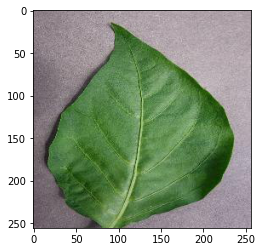

In [ ]:
img_width, img_height = 224, 224
img_path='/content/plantvillage/PlantVillage/Pepper__bell___healthy/016c8a9f-8eab-41b2-bb4b-0eb6ed0b2a7d___JR_HL 8591.JPG'
img = image.load_img(img_path,target_size =(img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
plt.imshow(mpimg.imread(img_path))
a=model.predict(img)
l=a.tolist()
l2=[]
for item in l:
    for it in item:
        l2.append(it)

category_list=[
'Pepper__bell___Bacterial_spot',
'Pepper__bell___healthy',

'Potato___Early_blight',

'Potato___Late_blight',

'Potato___healthy',

'Tomato_Bacterial_spot',

'Tomato_Early_blight'

'Tomato_Late_blight',

'Tomato_Leaf_Mold'

'Tomato_Septoria_leaf_spot',

'Tomato_Spider_mites_Two_spotted_spider_mite',

'Tomato__Target_Spot',

'Tomato__Tomato_YellowLeaf__Curl_Virus',

'Tomato__Tomato_mosaic_virus',

'Tomato_healthy']

for i in range(len(category_list)):
    if l2[i]==1.0:
        key=i
        print(category_list[key])
        break

DILATED CNN MODEL TRY


In [9]:

#Building a CNN using function API
import numpy as np
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical #for one hot encoding

In [10]:
# building the main model
inputs_dilated = Input(shape = (224,224,3))
x = Conv2D(filters=128,kernel_size=3,activation = 'relu',padding='same',dilation_rate=2)(inputs_dilated)
x = Conv2D(filters=64,kernel_size=3,activation = 'relu',padding='same',dilation_rate=2)(x)
x = Conv2D(filters=32,kernel_size=3,activation = 'relu',padding='same',dilation_rate=2)(x)
x = Conv2D(filters=32,kernel_size=3,activation = 'relu',padding='same',dilation_rate=2)(x)
x=Flatten()(x)
x = Dropout(0.4)(x)
outputs = Dense(15,activation = 'softmax')(x)

In [11]:
model_dilated = Model(inputs=inputs_dilated, outputs=outputs)

In [12]:
model_dilated.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
model_dilated.load_weights('Dilated_Weights.hdf5')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='Dilated_Weights.hdf5', verbose=1, 
                               save_best_only=True)

In [ ]:
# fit the model
r1 = model_dilated.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  callbacks= [checkpointer],
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



Epoch 1/5
645/645 [==============================] - 349s 489ms/step - loss: 1.9877 - accuracy: 0.3556 - val_loss: 0.8183 - val_accuracy: 0.7398

Epoch 00001: val_loss improved from inf to 0.81826, saving model to Dilated_Weights.hdf5
Epoch 2/5
645/645 [==============================] - 315s 488ms/step - loss: 0.7477 - accuracy: 0.7525 - val_loss: 0.3916 - val_accuracy: 0.8686

Epoch 00002: val_loss improved from 0.81826 to 0.39161, saving model to Dilated_Weights.hdf5
Epoch 3/5
645/645 [==============================] - 315s 488ms/step - loss: 0.5197 - accuracy: 0.8331 - val_loss: 0.4449 - val_accuracy: 0.8511

Epoch 00003: val_loss did not improve from 0.39161
Epoch 4/5
645/645 [==============================] - 314s 486ms/step - loss: 0.4152 - accuracy: 0.8652 - val_loss: 0.3426 - val_accuracy: 0.8829

Epoch 00004: val_loss improved from 0.39161 to 0.34261, saving model to Dilated_Weights.hdf5
Epoch 5/5
645/645 [==============================] - 312s 484ms/step - loss: 0.3494 - accu

NameError: ignored

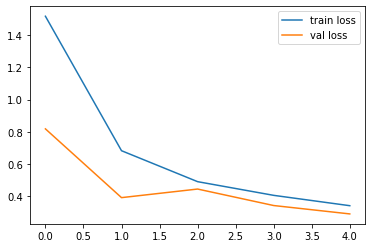

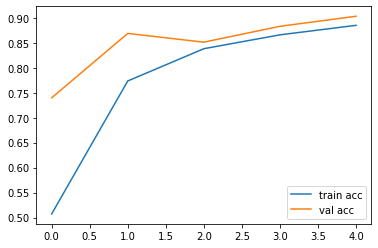

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
score=model_dilated.evaluate(test_set)

645/645 [==============================] - 87s 87ms/step - loss: 0.2906 - accuracy: 0.9030


Pepper__bell___healthy


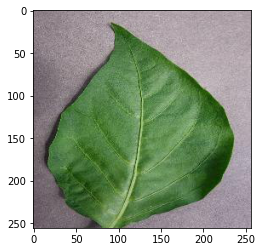

In [21]:
img_width, img_height = 224, 224
img_path='/content/plantvillage/PlantVillage/Pepper__bell___healthy/016c8a9f-8eab-41b2-bb4b-0eb6ed0b2a7d___JR_HL 8591.JPG'

img = image.load_img(img_path,target_size =(img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
plt.imshow(mpimg.imread(img_path))
a=model_dilated.predict(img)
l=a.tolist()
l2=[]
for item in l:
    for it in item:
        l2.append(it)

category_list=[
'Pepper__bell___Bacterial_spot',
'Pepper__bell___healthy',

'Potato___Early_blight',

'Potato___Late_blight',

'Potato___healthy',

'Tomato_Bacterial_spot',

'Tomato_Early_blight'

'Tomato_Late_blight',

'Tomato_Leaf_Mold'

'Tomato_Septoria_leaf_spot',

'Tomato_Spider_mites_Two_spotted_spider_mite',

'Tomato__Target_Spot',

'Tomato__Tomato_YellowLeaf__Curl_Virus',

'Tomato__Tomato_mosaic_virus',

'Tomato_healthy']

for i in range(len(category_list)):
    if l2[i]==1.0:
        key=i
        print(category_list[key])
        break